### PySpark

PySpark is nothing but the Python API for Apache Spark. It offers PySpark Shell which connects the Python API to the spark core and in turn initializes the Spark context.
* For any spark functionality, the entry point is SparkContext.
* SparkContext uses Py4J to launch a JVM and creates a JavaSparkContext.
* By default, PySpark has SparkContext available as sc, so creating a new SparkContext won't work.

### Py4J

* PySpark is built on top of Spark's Java API.
* Data is processed in Python and cached / shuffled in the JVM.
* Py4J enables Python programs running in a Python interpreter to dynamically access Java objects in a Java Virtual Machine.
* Here methods are called as if the Java objects resided in the Python interpreter and Java collections. can be accessed through standard Python collection methods.
* In the Python driver program, SparkContext uses Py4J to launch a JVM and create a JavaSparkContext.
* To establish local communication between the Python and Java SparkContext objects Py4J is used on the driver.

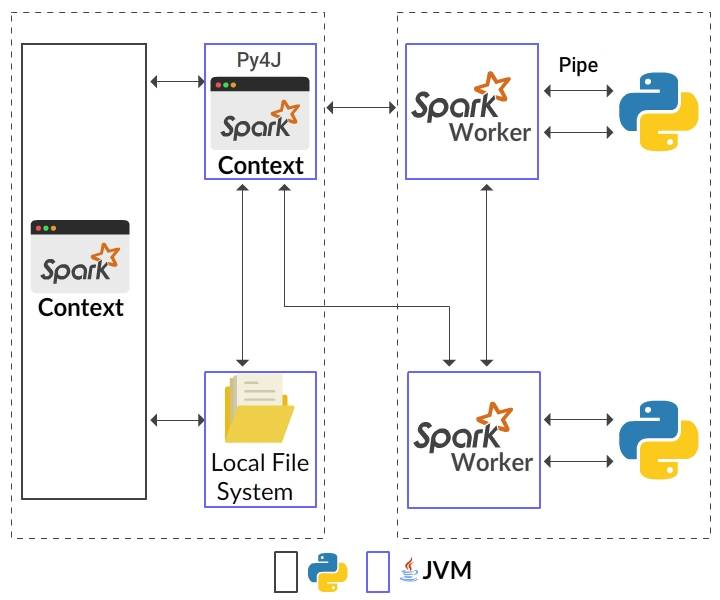

### Installation and Configuration of PySpark

* PySpark requires Python 2.6 or higher.
* PySpark applications are executed using a standard CPython interpreter in order to support Python modules that use C extensions.
* By default, PySpark requires python to be available on the system PATH and use it to run programs.
* Among PySpark’s library dependencies all of them are bundled with PySpark including Py4J and they are automatically imported.

In [1]:
import pyspark
from pyspark.sql import SparkSession


spark=SparkSession.builder.appName('LearnPySpark').getOrCreate()
sparkContext=spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/14 18:12:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Resilient Distributed Datasets (RDDs)
* Resilient distributed datasets (RDDs) are known as the main abstraction in Spark.
* It is a partitioned collection of objects spread across a cluster, and can be persisted in memory or on disk.
* Once RDDs are created they are immutable.

### Features Of RDDs
* Resilient, i.e. tolerant to faults using RDD lineage graph and therefore ready to recompute damaged or missing partitions due to node failures.
* Dataset - A set of partitioned data with primitive values or values of values, For example, records or tuples.
* Distributed with data remaining on multiple nodes in a cluster.

##### There are two ways to create RDDs:
* Parallelizing a collection in driver program.
```python 
sparkContext=spark.sparkContext
distData = sparkContext.parallelize(data)
```
* Referencing one dataset in an external storage system, like a shared filesystem, HBase, HDFS, or any data source providing a Hadoop InputFormat.
    * Referencing one dataset in an external storage system, like a shared filesystem, HBase, HDFS, or any data source providing a Hadoop InputFormat.
    * For example, text file RDDs can be created using the method SparkContext’s textFile. For the file (local path on the machine, hdfs://, s3n://, etc URI) the above method takes a URI and then reads it as a collection containing lines to produce the RDD.
```python
distFile = sc.textFile("data.txt")
```

In [2]:
### Creating RDDs using 
data = [1, 2, 3, 4, 5]
distData = sparkContext.parallelize(data)
distData

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

### RDD Operations
RDD Operations supports two type of operations:
* **transformations**, which create a new dataset from an existing one. (map is a transformation that passes each dataset element through a function and returns a new RDD representing the results.)
* **actions**, which return a value to the driver program after running a computation on the dataset. (reduce is an action which aggregates all RDD elements by using some functions and then returns the final result to driver program.) 

In [3]:
# defines a base RDD from an external file.
lines = sparkContext.textFile("data/input/data.txt")

# lineLengths as the result of a map transformation.
lineLengths = lines.map(lambda s: len(s))

# reduce, which is an action.
totalLength = lineLengths.reduce(lambda a, b: a + b)
print(lineLengths)
print(totalLength)


PythonRDD[4] at RDD at PythonRDD.scala:53
19


### Transformations
* Transformations are functions that use an RDD as the input and return one or more RDDs as the output.
* randomSplit, cogroup, join, reduceByKey, filter, and map are examples of few transformations.
* Transformations do not change the input RDD, but always create one or more new RDDs by utilizing the computations they represent.
* By using transformations, you incrementally create an RDD lineage with all the parent RDDs of the last RDD.
* Transformations are lazy, i.e. are not run immediately. Transformations are done on demand.
* Transformations are executed only after calling an action.

In [4]:
# Example of transformation
# filter(func): Returns a new dataset (RDD) that are created by choosing the elements of the source on which the function returns true.
# map(func): Passes each element of the RDD via the supplied function.
# union(): New RDD contains elements from source argument and RDD.
# intersection(): New RDD includes only common elements from source argument and RDD.
# cartesian(): New RDD cross product of all elements from source argument and RDD.

### Actions
* Actions return concluding results of RDD computations.
* Actions trigger execution utilising lineage graph to load the data into original RDD, and then execute all intermediate transformations and write final results out to file system or return it to Driver program.
* `Count, collect, reduce, take, and first` are few actions in spark.

In [5]:
# Example of Actions
# count(): Get the number of data elements in the RDD.
# collect(): Get all the data elements in an RDD as an array.
# reduce(func): Aggregate the data elements in an RDD using this function which takes two arguments and returns one.
# take (n): Fetch first n data elements in an RDD computed by driver program.
# foreach(func): Execute function for each data element in RDD. usually used to update an accumulator or interacting with external systems.
# first(): Retrieves the first data element in RDD. It is similar to take(1).
# saveAsTextFile(path): Writes the content of RDD to a text file or a set of text files to local file system/HDFS.

### What is Dataframe ?
* In general DataFrames can be defined as a data structure, which is tabular in nature. It represents rows, each of them consists of a number of observations.
* Rows can have a variety of data formats (heterogeneous), whereas a column can have data of the same data type (homogeneous).
* They mainly contain some metadata in addition to data like column and row names.

### Why DataFrames ?
* DataFrames are widely used for processing a large collection of structured or semi-structured data
* They are having the ability to handle petabytes of data
* In addition, it supports a wide range of data format for reading as well as writing
* As a conclusion DataFrame is data organized into named columns

### Feature of DataFrame
* Distributed - DataFrames are Distributed in Nature, which makes it fault tolerant and highly available data structure.
* Lazy Evals - Lazy Evaluation is an evaluation strategy which will hold the evaluation of an expression until its value is needed.
* Immutable - DataFrames are Immutable in nature which means that it is an object whose state cannot be modified after it is created.

### Spark SQL
* Spark introduces a programming module for structured data processing called Spark SQL.
* It provides a programming abstraction called DataFrame and can act as distributed SQL query engine.

### Feature of Spark SQL
* Provides DataFrame abstraction in Scala, Java, and Python.
* Spark SQL can read and write data from Hive Tables, JSON, and Parquet in various structured formats.
* Data can be queried by using Spark SQL.

### Important classes of Spark SQL and DataFrames
* `pyspark.sql.SparkSession` :Main entry point for Dataframe SparkSQL functionality
* `pyspark.sql.DataFrame` :A distributed collection of data grouped into named columns
* `pyspark.sql.Column` : A column expression in a DataFrame.
* `pyspark.sql.Row` : A row of data in a DataFrame.
* `pyspark.sql.GroupedData` :Aggregation methods, returned by DataFrame.groupBy().
* `pyspark.sql.DataFrameNaFunctions` : Methods for handling missing data (null values).
* `pyspark.sql.DataFrameStatFunctions` : Methods for statistics functionality.
* `pyspark.sql.functions` : List of built-in functions available for DataFrame.
* `pyspark.sql.types` : List of data types available.
* `pyspark.sql.Window` : For working with window functions.

In [6]:
from pyspark.sql import *
Student = Row("firstName", "lastName", "age", "telephone")
s1 = Student('David', 'Julian', 22, 100000)
s2 = Student('Mark', 'Webb', 23, 658545)
StudentData=[s1,s2]
df=spark.createDataFrame(StudentData)
df.show()

+---------+--------+---+---------+
|firstName|lastName|age|telephone|
+---------+--------+---+---------+
|    David|  Julian| 22|   100000|
|     Mark|    Webb| 23|   658545|
+---------+--------+---+---------+



### Data Sources
* Spark SQL supports operating on a variety of data sources through the DataFrame interface.
* A DataFrame can be operated on using relational transformations and can also be used to create a temporary view.
* Registering a DataFrame as a temporary view allows you to run SQL queries over its data.
* This chapter describes the general methods for loading and saving data using the Spark Data Sources.

In [7]:
# Spark load the data source from the defined file path
df = spark.read.load("data/input/file.csv", format="csv")
df.coalesce(1)
# The DataFrame is saved in the defined format
df.select("_c0", "_c1").write.csv("data/output/output.csv", mode='Overwrite')

### Apache Parquet
* Apache Parquet is a columnar storage format available to all projects in the Hadoop ecosystem, irrespective of the choice of the framework used for data processing, the model of data or programming language used.
* Spark SQL provides support for both reading and writing Parquet files.
* Automatic conversion to nullable occurs when one tries to write Parquet files, This is done due to compatibility reasons.

### Why Parquet File Format ?
* Parquet stores nested data structures in a flat columnar format.
* On comparing with the traditional way instead of storing in row-oriented way in parquet is more efficient
* Parquet is the choice of Big data because it serves both needs, efficient and performance in both storage and processing.

### Operation on CSV File

* **path**: Specifies the path to the CSV file or directory containing CSV files.
* **header**: Specifies whether the first line of the CSV file should be treated as a header containing column names. Defaults to False.
* **inferSchema**: Specifies whether Spark should automatically infer the schema (data types) of the columns from the data. Defaults to False.
* **delimiter**: Specifies the delimiter used to separate fields in the CSV file. Defaults to ','.
* **quote**: Specifies the character used to quote fields containing special characters. Defaults to '"'.
* **escape**: Specifies the character used to escape the delimiter or quote character when they appear in the data. Defaults to '\'.
* **ignoreLeadingWhiteSpace**: Specifies whether leading whitespaces should be ignored when reading data. Defaults to False.
* **ignoreTrailingWhiteSpace**: Specifies whether trailing whitespaces should be ignored when reading data. Defaults to False.
* **nullValue**: Specifies the string representation of a null value in the CSV file. Defaults to an empty string.
* **dateFormat**: Specifies the format of date columns in the CSV file. Defaults to "yyyy-MM-dd".
* **timestampFormat**: Specifies the format of timestamp columns in the CSV file. Defaults to "yyyy-MM-dd'T'HH:mm:ss.SSSXXX".
* **maxColumns**: Specifies the maximum number of columns to read from the CSV file. Defaults to -1, which means all columns will be read.
* **maxCharsPerColumn**: Specifies the maximum number of characters to read for each column. Defaults to -1, which means all characters will be read.

In [8]:
### CSV Loading
df = spark.read.csv("data/input/file.csv", inferSchema = True, header = True)

# print dataframe
df.show()

# print first row of dataframe
df.show(1)

# print schema
df.printSchema()

# print column
df.columns

# column count
print(len(df.columns))

# row count
df.select('col3').count()

# describe
df.describe('col3').show()


+----+----+----+
|col1|col2|col3|
+----+----+----+
|   a|   1|   2|
|   a|   2|   3|
|   a|   2|   4|
+----+----+----+

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   a|   1|   2|
+----+----+----+
only showing top 1 row

root
 |-- col1: string (nullable = true)
 |-- col2: integer (nullable = true)
 |-- col3: integer (nullable = true)

3
+-------+----+
|summary|col3|
+-------+----+
|  count|   3|
|   mean| 3.0|
| stddev| 1.0|
|    min|   2|
|    max|   4|
+-------+----+



In [9]:
## Select 

# select multiple coloumns
df.select('col1','col2').show()

# filter
df.select('col1','col2').filter((df.col1=='a') & (df.col2==2)).show()

# order by
df.filter((df.col1=='a') & (df.col2==2)).orderBy('col3', ascending=False).show()


+----+----+
|col1|col2|
+----+----+
|   a|   1|
|   a|   2|
|   a|   2|
+----+----+

+----+----+
|col1|col2|
+----+----+
|   a|   2|
|   a|   2|
+----+----+

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   a|   2|   4|
|   a|   2|   3|
+----+----+----+



### Statistical and Mathematical Functions with DataFrames in Apache Spark
* DataFrames are introduced in Spark 1.3 to make operations using Spark easier.
* Statistics is an important aspect in modern data science.
* In this module, we walk through some of the main concepts, including:
    * Random data generation
    * Summary and descriptive statistics
    * Sample covariance and correlation
    * Cross-tabulation

In [10]:
from pyspark.sql.functions import rand,randn
from pyspark.sql.functions import mean, min, max

### Randam Data Generation
df1 = spark.range(0,7)
df1 = df1.select("id").orderBy(rand()).limit(4)
df1.show()
df1.select("id", rand(seed=10).alias("uniform"), randn(seed=27).alias("normal")).show()

# mean, mode, max
df.select([mean('col2'), min('col2'), max('col3')]).show()

# co-variance
df.stat.corr('col2', 'col3')

# correlation
df.stat.corr('col2', 'col3')

# cross tab -> get occurense of data 
df1 = spark.createDataFrame([(1, 11), (1, 11), (3, 10), (4, 8), (4, 8)], ["c1", "c2"])
df1.crosstab("c1", "c2").sort("c1_c2").show()

+---+
| id|
+---+
|  1|
|  4|
|  6|
|  5|
+---+

+---+------------------+-------------------+
| id|           uniform|             normal|
+---+------------------+-------------------+
|  1|0.1709497137955568|-0.8664700627108758|
|  4|0.8051143958005459|-0.5970491018333267|
|  6|0.5775925576589018|0.18267161219540898|
|  5|0.9476047869880925|-1.8497305679917546|
+---+------------------+-------------------+

+------------------+---------+---------+
|         avg(col2)|min(col2)|max(col3)|
+------------------+---------+---------+
|1.6666666666666667|        1|        4|
+------------------+---------+---------+



24/06/14 18:12:47 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+-----+---+---+---+
|c1_c2| 10| 11|  8|
+-----+---+---+---+
|    1|  0|  2|  0|
|    3|  1|  0|  0|
|    4|  0|  0|  2|
+-----+---+---+---+



### What is Spark SQL ?
* Spark SQL brings native support for SQL to Spark.
* Spark SQL blurs the lines between RDD's and relational tables.
* We can extend Hive's SQL with the user code by using user-defined functions (UDFs), user-defined aggregates (UDAFs), and user-defined table functions (UDTFs).
* Hive comes with built-in connectors for comma and tab-separated values (CSV/TSV) text files, Apache Parquet,Apache ORC, and other formats.

### Performing SQL Queries
* We can also pass SQL queries directly to any DataFrame.
* For that, we need to create a table from the DataFrame using the registerTempTable method.
* After that use sqlContext.sql() to pass the SQL queries.

### Features of Apache Hive
* Apache Hive is having tools to allow easy and quick access to data using SQL, thus enables data warehousing tasks such like extract/transform/load (ETL), reporting, and data analysis.
* Mechanisms for imposing structure on a variety of data formats.
* Access to files stored either directly in Apache HDFS or in other data storage systems such as Apache HBase.
* Query execution via Apache Tez,Apache Spark, or MapReduce.
* A procedural language with HPL-SQL.
* Sub-second query retrieval via Hive LLAP, Apache YARN and Apache Slider.

### Connecting Hive From Spark
When working with Hive, one must instantiate SparkSession with Hive support, including connectivity to a persistent Hive metastore, support for Hive serdes, and Hive user-defined functions.

In [ ]:
# Put your code here

from pyspark.sql import SparkSession
from pyspark.sql import Row


spark=SparkSession.builder.appName('handsOn3').getOrCreate()
headers=Row("ID","Name","Age","Area of Interest")
row1=headers("1","Jack",22,"Data Science")
row2=headers("2","Luke",21,"Data Analytics")
row3=headers("3","Leo",24,"Micro Services")
row4=headers("4","Mark",21,None)
headers=[row1,row2,row3,row4]
df=spark.createDataFrame(headers)
df.coalesce(1)
df.describe("Age").write.parquet("Age", mode='Overwrite')
df.select("ID","Name","Age").orderBy("Name", ascending=False).write.parquet("NameSorted",  mode='Overwrite')


In [ ]:
df.show()
df=df.na.drop(subset=['Area of Interest'])
df.show()

In [ ]:
df.filter(df.ID=='1').withColumn('a',df.ID).show()


In [ ]:
print(spark.sparkContext.getConf().getAll())

In [11]:
from os.path import expanduser, join, abspath

from pyspark.sql import SparkSession
from pyspark.sql import Row

#warehouse_location points to the default location for managed databases and tables

warehouse_location = abspath('spark-warehouse')

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Hive integration example") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .config("spark.sql.catalogImplementation", "hive") \
    .enableHiveSupport() \
    .getOrCreate()

# spark.conf.set("spark.sql.catalogImplementation", "hive")

spark.sql("use default")
spark.sql("CREATE TABLE IF NOT EXISTS table_name(column_name_1 string,column_name_2 string,column_name_n string) USING hive")
spark.sql("show tables").show()
spark.sql("select * from table_name").show()
spark.stop()

24/06/14 18:12:49 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


AnalysisException: [NOT_SUPPORTED_COMMAND_WITHOUT_HIVE_SUPPORT] CREATE Hive TABLE (AS SELECT) is not supported, if you want to enable it, please set "spark.sql.catalogImplementation" to "hive".;
'CreateTable `spark_catalog`.`default`.`table_name`, Ignore
